# Scikit-learn

In [1]:
from IPython.display import Image
Image('ml_map.png')

#### Prevendo o Preço da Pizza

###### Suponha que você queira prever o preço da pizza.Para isso, vamos criar um modelo de regressão lin ear para prever o preço da pizza, baseado em um atributo da pizza que podemos observar. Vamos modelar a relação entre o tamanha (diâmetro) de um pizza e seu preço. Escrevemos então um programa com scikit-learn, que prevê o preço da pizza dado seu tamanho.                                                                                                         

In [2]:
# Importando Matplotlib e Numpy

import matplotlib.pyplot as plt
import numpy  as np
%matplotlib inline

In [3]:
# Diâmetros (cm)
Diametros = [[7], [10], [15], [30], [45]]


# Preços (R$)
Precos = [[8], [11], [16], [38.5], [52]]


##### Vamos visualizar estes dados construindo um plot 

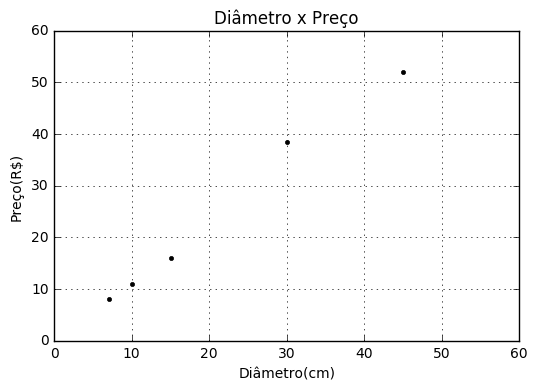

In [4]:
plt.figure()
plt.xlabel('Diâmetro(cm)')
plt.ylabel('Preço(R$)')
plt.title('Diâmetro x Preço')
plt.plot(Diametros, Precos, 'k.')
plt.axis([0,60,0,60])
plt.grid(True)
plt.show()


In [5]:
# Import o módulo de Regressão Linear do Scikit-learn
from sklearn.linear_model import LinearRegression

In [6]:
# Preparando os dados de treino

# Vamos chamar de X os dados de diâmetro da Pizza.
x = [[7], [10], [15], [30], [45]]


# Vamos chamar de Y os dados de preço da Pizza
y = [[8], [11], [16], [38.5], [52]]



In [7]:
modelo = LinearRegression()

In [8]:
type(modelo)

sklearn.linear_model.base.LinearRegression

In [9]:
# Treinando o modelo
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Prevendo o preço de uma pizza de 20 cm de diâmetro

print("Uma pizza de 20 cm de diâmetro deve custar : %.2f" % modelo.predict([200][0]))

Uma pizza de 20 cm de diâmetro deve custar : 240.17


In [16]:
# Coeficientes 

print('Coeficiente: \n', modelo.coef_)

# MSE (mean square error)
print("MSE: %.2f" % np.mean((modelo.predict(x) - y) ** 2))

#Score de variação:  1 representa a predição perfeita
print('Score de variação: %.2f', modelo.score(x, y))

Coeficiente: 
 [[ 1.20422117]]
MSE: 2.74
Score de variação: %.2f 0.990718915627


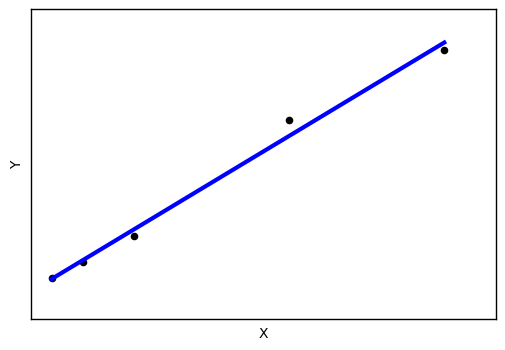

In [17]:
plt.scatter(x, y, color="black")
plt.plot(x, modelo.predict(x), color='blue', linewidth = 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
### Exemplo usando o Dataset Boston Housing 


import pandas as pd
import scipy.stats as stats
import sklearn


In [20]:
# O dataset já está disponível no scikit-learn. Precisamos apenas carrega-lo
from sklearn.datasets import load_boston
boston = load_boston()

In [21]:
# Verificando o shape do dataset, neste caso 506 instÂNCIAS (LINHAS) e 13 atributos (cokunas) 
boston.data.shape

(506, 13)

In [22]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [24]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [25]:
# Convertendo o dataset em um DataFrame pandas

df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
# Convertendo o título das colunas 

df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
# boston.target é um array com os preços das casas

boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [29]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Prevendo o preço das casas em boston

In [30]:
# Y - variável dependen (preço das casas em Boston)
# X - variaveis independentes ou explanatórias (todas as outras caracteristicas da casa)

from sklearn.linear_model import LinearRegression

X = df.drop('PRICE', axis = 1)
Y = df.PRICE

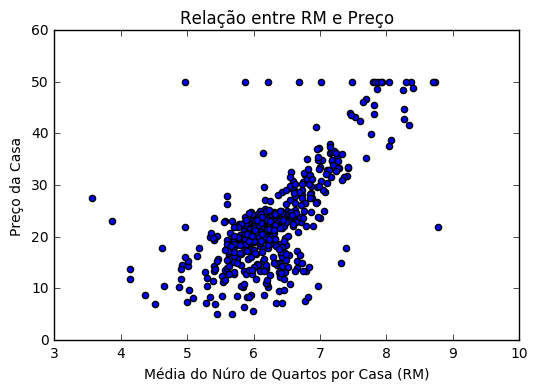

In [31]:
plt.scatter(df.RM, Y)
plt.xlabel("Média do Núro de Quartos por Casa (RM)")
plt.ylabel("Preço da Casa")
plt.title("Relação entre RM e Preço")
plt.show()


In [33]:
# Criando o objeto de regressão linear

regr = LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
type(regr)

sklearn.linear_model.base.LinearRegression

In [35]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print("Coeficiente:  ",regr.intercept_)
print("Número de Coeficiente:  ", len(regr.coef_))

Coeficiente:   36.4911032804
Número de Coeficiente:   13


In [38]:
regr.predict(X)

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483,  18.9958266 ,  21.58970854,
        20.90534851,  19.55535931,  19.2837957 ,  19.30000174,
        20.52889993,  16.9096749 ,  16.17067411,  18.40781636,
        12.52040454,  17.67104565,  15.82934891,  13.80368317,
        15.67708138,  13.3791645 ,  15.46258829,  14.69863607,
        19.54518512,  20.87309945,  11.44806825,  18.05900412,
         8.78841666,  14.27882319,  13.69097132,  23.81755469,
        22.34216285,  23.11123204,  22.91494157,  31.35826216,
        34.21485385,  28.0207132 ,  25.20646572,  24.61192851,
        22.94438953,  22.10150945,  20.42467417,  18.03614022,
         9.10176198,  17.20856571,  21.28259372,  23.97621248,
        27.65853521,  24.0521088 ,  15.35989132,  31.14817003,
        24.85878746,  33.11017111,  21.77458036,  21.08526739,
        17.87203538,  18.50881381,  23.9879809 ,  22.54

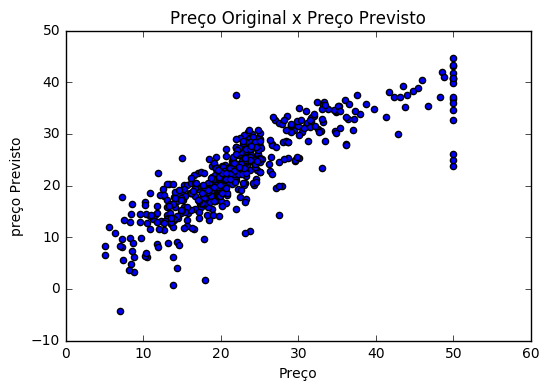

In [39]:
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço")
plt.ylabel("preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

In [41]:
# vamos calcular o MSE 

mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.897779217687486


In [42]:
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376927


In [43]:
# Dividindo X em dados de treino e dados de teste
X_treino  = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]


# imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)


(456, 13) (50, 13) (456,) (50,)


In [44]:
X_treino, X_teste, Y_treino, Y_teste = sklearn.cross_validation.train_test_split(X, df.PRICE, test_size = 0.33, random_state = 42)

In [45]:
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(339, 13) (167, 13) (339,) (167,)


In [46]:
regr = LinearRegression()


In [47]:
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

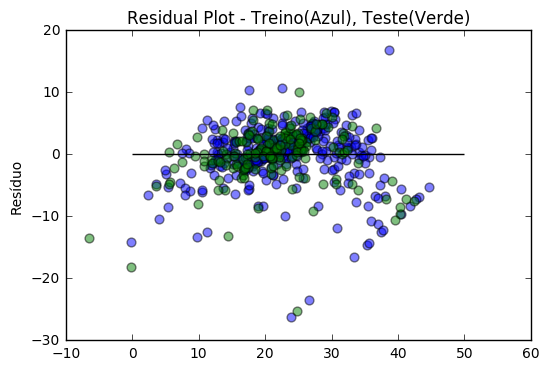

In [50]:
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s=40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) -Y_teste, c='g', s=40, alpha=0.5)
plt.hlines(y =0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()